<a href="https://colab.research.google.com/github/dvlpana/SparkPlatzi/blob/main/CursoSpakPlatzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!apt-get install  openjdk-8-jdk-headless -qq > /dev/null
!ad-apt-repository ppa:openjdk-r/ppa
!apt-get update && sudo apt-get upgrade -y
!apt-get -y install openjdk-8-jre
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar -xvf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

/bin/bash: ad-apt-repository: command not found
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Package

In [2]:
!pip install -q findspark

In [3]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop2.7  spark-3.1.1-bin-hadoop2.7.tgz


In [4]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping
Done Sleeping


In [5]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop2.7  spark-3.1.1-bin-hadoop2.7.tgz


In [6]:
!head -n 15 /content/sample_data/files_curso_spark/data.csv

State,Color,Count
TX,Red,20
NV,Blue,66
CO,Blue,79
OR,Blue,71
WA,Yellow,93
WY,Blue,16
CA,Yellow,53
WA,Green,60
OR,Green,71
TX,Green,68
NV,Green,59
AZ,Brown,95
WA,Yellow,20
AZ,Blue,75


In [7]:
!spark-submit /content/sample_data/files_curso_spark/codeExample.py /content/sample_data/files_curso_spark/data.csv

21/06/16 12:32:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
21/06/16 12:32:25 INFO SparkContext: Running Spark version 3.1.2
21/06/16 12:32:25 INFO ResourceUtils: ==============================================================
21/06/16 12:32:25 INFO ResourceUtils: No custom resources configured for spark.driver.
21/06/16 12:32:25 INFO ResourceUtils: ==============================================================
21/06/16 12:32:25 INFO SparkContext: Submitted application: PythonMnMCount
21/06/16 12:32:25 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
21/06/16 12:32:25 INFO Resour

In [8]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop2.7  spark-3.1.1-bin-hadoop2.7.tgz


In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [10]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark


In [11]:
archivo = './sample_data/files_curso_spark/data.csv'
df_spark = spark.read.csv(archivo, inferSchema=True, header=True)

# imprimir tipo de archivo
print(type(df_spark))

<class 'pyspark.sql.dataframe.DataFrame'>


¿Nombre de las Columnas de dataframe?

In [12]:
df_spark.columns

['State', 'Color', 'Count']

Estructura del dataframe

In [13]:
df_spark.printSchema()

root
 |-- State: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Count: integer (nullable = true)



Ver los primeros 20 registros del dataframe

In [14]:
df_spark.show()

+-----+------+-----+
|State| Color|Count|
+-----+------+-----+
|   TX|   Red|   20|
|   NV|  Blue|   66|
|   CO|  Blue|   79|
|   OR|  Blue|   71|
|   WA|Yellow|   93|
|   WY|  Blue|   16|
|   CA|Yellow|   53|
|   WA| Green|   60|
|   OR| Green|   71|
|   TX| Green|   68|
|   NV| Green|   59|
|   AZ| Brown|   95|
|   WA|Yellow|   20|
|   AZ|  Blue|   75|
|   OR| Brown|   72|
|   NV|   Red|   98|
|   WY|Orange|   45|
|   CO|  Blue|   52|
|   TX| Brown|   94|
|   CO|   Red|   82|
+-----+------+-----+
only showing top 20 rows



Descricipcion Estadistica del dataframe

In [15]:
df_spark.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
State,99999,None,None,AZ,WY
Color,99999,None,None,Blue,Yellow
Count,99999,55.00090000900009,26.26648202084822,10,100


Descripcion estadistica de una sola columna (‘median_house_value’)

In [16]:
df_spark.describe(['color']).show()

+-------+------+
|summary| color|
+-------+------+
|  count| 99999|
|   mean|  null|
| stddev|  null|
|    min|  Blue|
|    max|Yellow|
+-------+------+



## 8 Transformaciones y Acciones

In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

sc = spark.sparkContext
lines = sc.textFile("spark-2.4.4-bin-hadoop2.7/README.md")
sc



<SparkContext master=local[*] appName=pyspark-shell>

In [18]:
path = '/content/sample_data/files_curso_spark/'
equiposOlimpicosRDD = sc.textFile(path+'paises.csv') \
.map(lambda line: line.split(","))

# Muestra la data con take , evita utilizar collect()

In [19]:
equiposOlimpicosRDD.take(10)



[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG'],
 ['5', 'Afghanistan', 'AFG'],
 ['6', 'Akatonbo', 'IRL'],
 ['7', 'Alain IV', 'SUI'],
 ['8', 'Albania', 'ALB'],
 ['9', 'Alcaid', 'POR']]

9 Acciones de modificacion sobre RDDs

In [20]:
##Contar cuantas siglas tenemos
equiposOlimpicosRDD.map(lambda x: (x[2])).distinct().count()

231

In [21]:
##Agrupación a partir de siglas y obtener cantidad de equipos por país
equiposOlimpicosRDD \
.map(lambda x: (x[2], x[1])) \
.groupByKey() \
.mapValues(len).take(5)

[('ARG', 18), ('AFG', 1), ('IRL', 7), ('POR', 21), ('AUS', 23)]

In [22]:
rdd1 = sc.parallelize([1,2,3])
type(rdd1)

pyspark.rdd.RDD

In [23]:
##Agrupación a partir de siglas y obtener cantidad de equipos por país
equiposOlimpicosRDD \
.map(lambda x: (x[2], x[1])) \
.groupByKey() \
.mapValues(list).take(3)

[('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking']),
 ('AFG', ['Afghanistan']),
 ('IRL',
  ['Akatonbo',
   'Aletta',
   'Ireland',
   'Ireland-1',
   'Ireland-2',
   'The Cloud',
   'Three Leaves'])]

In [24]:
##Obtener los datos sólo de un país o contenido con filter()
equiposArgentinos = equiposOlimpicosRDD.filter(lambda x: "ARG" in x)
equiposArgentinos.collect()

[['4', 'Acturus', 'ARG'],
 ['37', 'Antares', 'ARG'],
 ['42', 'Arcturus', 'ARG'],
 ['43', 'Ardilla', 'ARG'],
 ['45', 'Argentina', 'ARG'],
 ['46', 'Argentina-1', 'ARG'],
 ['47', 'Argentina-2', 'ARG'],
 ['119', 'Blue Red', 'ARG'],
 ['238', 'Covunco III', 'ARG'],
 ['252', 'Cupidon III', 'ARG'],
 ['288', 'Djinn', 'ARG'],
 ['436', 'Gullvinge', 'ARG'],
 ['644', 'Matrero II', 'ARG'],
 ['672', 'Mizar', 'ARG'],
 ['774', 'Pampero', 'ARG'],
 ['843', 'Rampage', 'ARG'],
 ['1031', 'Tango', 'ARG'],
 ['1162', 'Wiking', 'ARG']]

In [25]:
## Cuenta todos los valores, nada recomendable para datos extensos
equiposOlimpicosRDD.count()

1185

In [26]:
##Cuenta  hasta el tiempo aproximado
equiposOlimpicosRDD.countApprox(20)

1185

10 Acciones de conteo sobre RDDs

In [27]:
## importamos ambos
deportistaOlimpicoRDD = sc.textFile(path+'deportista.csv') \
.map(lambda line: line.split(","))

deportistaOlimpicoRDD2 = sc.textFile(path+'deportista2.csv') \
.map(lambda line: line.split(","))

In [28]:
## Unimos los RDD con union(). Spark solo tiene esta operacion
deportistaOlimpicoRDD = deportistaOlimpicoRDD.union(deportistaOlimpicoRDD2)

In [29]:
deportistaOlimpicoRDD.count()

135572

In [30]:
##Ver contenido en equipos olimpicos
equiposOlimpicosRDD.top(2)

[['id', 'equipo', 'sigla'], ['999', 'Stella-2', 'NOR']]

In [31]:
deportistaOlimpicoRDD.top(2)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['99999', 'Alexander Grant Alick Rennie', '1', '32', '182', '71', '967']]

In [32]:
# seleccionamos las comumnas ID para hacer un join
deportistaOlimpicoRDD \
.map(lambda deportista: [deportista[-1],deportista[:-1]]) \
.join(equiposOlimpicosRDD.map(lambda equipo: [equipo[0], equipo [2]])) \
.take(6)

[('278', (['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0'], 'SWE')),
 ('278', (['86368', 'August Nilsson', '1', '27', '0', '0'], 'SWE')),
 ('278', (['112720', 'Gustaf Fredrik Sderstrm', '1', '34', '0', '0'], 'SWE')),
 ('278',
  (['114107', 'Karl Gustaf Vilhelm Staaf Johansson ', '1', '19', '0', '0'],
   'SWE')),
 ('278',
  (['130945', 'Charles Gustav Wilhelm Winckler', '1', '33', '0', '0'], 'SWE')),
 ('982', (['51', 'Nstor Abad Sanjun', '1', '23', '167', '64'], 'ESP'))]

In [33]:
# utilizamos takeSample (repetidos, muestra, semilla)
deportistaOlimpicoRDD \
.map(lambda deportista: [deportista[-1],deportista[:-1]]) \
.join(equiposOlimpicosRDD.map(lambda equipo: [equipo[0], equipo [2]])) \
.takeSample(False,6,25)

[('514', (['58198', 'Mayumi Kawasaki', '2', '24', '167', '52'], 'JPN')),
 ('399',
  (['129907', 'Armin Christian Weyrauch', '1', '28', '193', '95'], 'GER')),
 ('487', (['53275', 'Khashaba Dadasaheb Jahdav', '1', '21', '0', '0'], 'IND')),
 ('138',
  (['110517', 'Hlio Frederico Gomes da Silva', '1', '22', '183', '79'],
   'BRA')),
 ('507', (['121829', 'Nicola Trentin', '1', '30', '178', '70'], 'ITA')),
 ('138',
  (['23297', 'Kissya Cataldo da Costa', '2', '30', '180', '67'], 'BRA'))]

In [34]:
resultado = sc.textFile(path+'resultados.csv') \
.map(lambda line: line.split(","))

In [35]:
resultadoGanador = resultado.filter(lambda w: 'NA' not in w[1])

In [36]:
resultadoGanador.take(5)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['4', 'Gold', '4', '2', '4'],
 ['38', 'Bronze', '15', '7', '19'],
 ['39', 'Bronze', '15', '7', '20'],
 ['41', 'Bronze', '16', '50', '14']]

In [37]:
##Reto Hacer un join con equipos y deportista para obtener valores importantes
deportistaOlimpicoRDD \
.map(lambda deportista: [deportista[-1],deportista[:-1]]) \
.join(equiposOlimpicosRDD.map(lambda equipo: [equipo[0], equipo [2]])) \
.join(resultadoGanador.map(lambda resultado: [resultado[2], resultado [1]])) \
.takeSample(False, 6, 25)


[('93',
  ((['73927', 'Yana Eduardovna Maksimova', '2', '19', '182', '70'], 'BLR'),
   'Gold')),
 ('705',
  ((['121086', 'Linda Toorop Moor ', '2', '16', '165', '53'], 'NED'), 'Gold')),
 ('1071',
  ((['118844', 'Nurcan Taylan', '2', '20', '151', '48'], 'TUR'), 'Silver')),
 ('705',
  ((['27539', 'Arnold Pieter Bernard Arno den Hartog', '1', '29', '187', '88'],
    'NED'),
   'Gold')),
 ('705',
  ((['66236', 'Frederik Joseph Frits Lamp', '1', '18', '0', '0'], 'NED'),
   'Bronze')),
 ('1181',
  ((['17015', 'Hastings Bwalya', '1', '23', '168', '64'], 'ZAM'), 'Gold'))]

Clase 11 Solucion reto deportistas

In [38]:
#esta clase muestra la solucion del profesor al reto.
deportistaPaises = deportistaOlimpicoRDD \
    .map(lambda l: [l[-1], l[:-1]]) \
    .join(equiposOlimpicosRDD.map(lambda x: [x[0], x[2]]))

deportistaPaises.join(resultadoGanador).take(6)


[('972',
  ((['3585', 'An JaeHyeong', '1', '23', '183', '74'], 'KOR'), 'Silver')),
 ('972', ((['19788', 'Chang YeNa', '2', '26', '172', '61'], 'KOR'), 'Silver')),
 ('972',
  ((['40891', 'Go SeongHyeon', '1', '25', '182', '85'], 'KOR'), 'Silver')),
 ('972',
  ((['44419', 'Ha JeongEun', '2', '21', '173', '66'], 'KOR'), 'Silver')),
 ('972',
  ((['45476', 'Han SangHun', '1', '23', '175', '79'], 'KOR'), 'Silver')),
 ('972',
  ((['51378', 'Hwang HyeYeong', '2', '26', '0', '0'], 'KOR'), 'Silver'))]

#Clase 12 Operaciones Numéricas
##En esta clase hacemos el encoding de los valores de las medallas y obtenemos los puntos que tiene cada país.
Acciones de Conteo sobre RDD

```
# Tiene formato de código
```



In [39]:
!ls ./sample_data/files_curso_spark/

codeExample.py	deportista2.csv      evento.csv		    paises.csv
data.csv	deportista.csv	     juegos.csv		    resultados.csv
deporte.csv	deportistaError.csv  modelo_relacional.jpg


In [40]:
#Almacenamos el puntaje por medalla
valoresMedallas = {'Gold'  :7,
                   'Silver':5,
                   'Bronze':4}

In [41]:
paisesMedallas = deportistaPaises.join(resultadoGanador)



In [42]:
paisesMedallas = paisesMedallas \
    .map(lambda x: (x[1][0][-1], valoresMedallas[x[1][1] ] ) )

In [43]:
paisesMedallas.take(5)

[('KOR', 5), ('KOR', 5), ('KOR', 5), ('KOR', 5), ('KOR', 5)]

In [44]:
from operator import add

conclusion = paisesMedallas.reduceByKey((add)) \
    .sortBy(lambda x:x[1], ascending=False)

In [45]:
conclusion.take(10)

[('CAN', 32538),
 ('ARG', 12520),
 ('HUN', 10860),
 ('MEX', 6124),
 ('RSA', 3788),
 ('BLR', 3580),
 ('LTU', 1535),
 ('MGL', 1460),
 ('USA', 1342),
 ('AZE', 1218)]

Clase 13 Creación de DataFrames

In [46]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import IntegerType, StringType, FloatType
from pyspark.sql.types import Row

from pyspark.sql import SQLContext





In [47]:
#spark = SparkContext(master='local', appName="DataFrames")
sqlContext = SQLContext(spark)




In [48]:
!ls ./sample_data/files_curso_spark/

codeExample.py	deportista2.csv      evento.csv		    paises.csv
data.csv	deportista.csv	     juegos.csv		    resultados.csv
deporte.csv	deportistaError.csv  modelo_relacional.jpg


In [49]:
!head -n 10 ./sample_data/files_curso_spark/juegos.csv

,nombre_juego,annio,temporada,ciudad
1,1896 Verano,1896,Verano,Athina
2,1900 Verano,1900,Verano,Paris
3,1904 Verano,1904,Verano,St. Louis
4,1906 Verano,1906,Verano,Athina
5,1908 Verano,1908,Verano,London
6,1912 Verano,1912,Verano,Stockholm
7,1920 Verano,1920,Verano,Antwerpen
8,1924 Invierno,1924,Invierno,Chamonix
9,1924 Verano,1924,Verano,Paris


In [50]:
spark

In [51]:
# Paso 1 crear un dataFrame es crearun Schema como una base de datos
path = '/content/sample_data/files_curso_spark/'
juegoSchema = StructType([
     StructField('juego_id', IntegerType(), False),
     StructField('anio', StringType(), False),
     StructField('temporada', StringType(), False),
     StructField('ciudad', StringType(), False),
    ])
# Paso 2 Crea Data Frame con la Lectura del Schema 
juegoDF = sqlContext.read.schema(juegoSchema) \
          .option('header', 'true').csv(path+'resultados.csv')

In [52]:
juegoDF.show(4)

+--------+----+---------+------+
|juego_id|anio|temporada|ciudad|
+--------+----+---------+------+
|       1|  NA|        1|    39|
|       2|  NA|        2|    49|
|       3|  NA|        3|     7|
|       4|Gold|        4|     2|
+--------+----+---------+------+
only showing top 4 rows



Clase 14 Inferencia de tipos de datos

In [53]:
deportistaOlimpicoRDD.take(5)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278']]

In [54]:
# Retiramos encabezados
def eliminarEncabezado(indice, iterador):
  return iter(list(iterador)[1:])

In [55]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD.\
mapPartitionsWithIndex(eliminarEncabezado)

In [56]:
deportistaOlimpicoRDD.take(5)

[['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278'],
 ['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705']]

In [57]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD.map(lambda l: (
    int(l[0]),
    l[1],
    int(l[2]),
    int(l[3]),
    int(l[4]),
    float(l[5]),
    int(l[6]),
))

In [58]:
deportistaOlimpicoRDD.take(5)

[(1, 'A Dijiang', 1, 24, 180, 80.0, 199),
 (2, 'A Lamusi', 1, 23, 170, 60.0, 199),
 (3, 'Gunnar Nielsen Aaby', 1, 24, 0, 0.0, 273),
 (4, 'Edgar Lindenau Aabye', 1, 34, 0, 0.0, 278),
 (5, 'Christine Jacoba Aaftink', 2, 21, 185, 82.0, 705)]

In [59]:
schema_deportistaOlimpico = StructType([
    StructField('deportista_id', IntegerType(),False),
    StructField('nombre', StringType(),False),
    StructField('genero', IntegerType(),False),
    StructField('edad', IntegerType(),False),
    StructField('altura', IntegerType(),False),
    StructField('peso', FloatType(),False),
    StructField('equipo_id', IntegerType(),False)
]    
)

In [60]:
deportistaDF =  sqlContext.createDataFrame(deportistaOlimpicoRDD, schema_deportistaOlimpico)

In [61]:
deportistaDF.show(5)

+-------------+--------------------+------+----+------+----+---------+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|
+-------------+--------------------+------+----+------+----+---------+
|            1|           A Dijiang|     1|  24|   180|80.0|      199|
|            2|            A Lamusi|     1|  23|   170|60.0|      199|
|            3| Gunnar Nielsen Aaby|     1|  24|     0| 0.0|      273|
|            4|Edgar Lindenau Aabye|     1|  34|     0| 0.0|      278|
|            5|Christine Jacoba ...|     2|  21|   185|82.0|      705|
+-------------+--------------------+------+----+------+----+---------+
only showing top 5 rows



Retos crear los demas DataFrames testantes a partir de los RDD

In [62]:
# Países  equipos, sc???
paisesRDD = sc.textFile(path+'paises.csv') \
.map(lambda line: line.split(",")) \
.mapPartitionsWithIndex(eliminarEncabezado) \
.map(lambda l:(
    int(l[0]),
    l[1],
    l[2]
))

schema = StructType([
    StructField('pais_id', IntegerType(),False),
    StructField('equipo', StringType(),False),
    StructField('sigla', StringType(),False)

]    
)

paisesDF =  sqlContext.createDataFrame(paisesRDD, schema)
paisesDF.show(5)

+-------+--------------------+-----+
|pais_id|              equipo|sigla|
+-------+--------------------+-----+
|      1|         30. Februar|  AUT|
|      2|A North American ...|  MEX|
|      3|           Acipactli|  MEX|
|      4|             Acturus|  ARG|
|      5|         Afghanistan|  AFG|
+-------+--------------------+-----+
only showing top 5 rows



In [63]:
resultados_schema = StructType([
    StructField("resultado_id", IntegerType(), False),
    StructField("medalla", StringType(), False),
    StructField("deportista_id", IntegerType(), False),
    StructField("juego_id", IntegerType(), False),
    StructField("evento_id", IntegerType(), False)
])

resultadosDF = sqlContext.read.format("csv").\
            option("header", True).\
            schema(resultados_schema).\
            load(path+"resultados.csv")

resultadosDF.show(4)

+------------+-------+-------------+--------+---------+
|resultado_id|medalla|deportista_id|juego_id|evento_id|
+------------+-------+-------------+--------+---------+
|           1|     NA|            1|      39|        1|
|           2|     NA|            2|      49|        2|
|           3|     NA|            3|       7|        3|
|           4|   Gold|            4|       2|        4|
+------------+-------+-------------+--------+---------+
only showing top 4 rows



In [64]:
evento_schema = StructType([
    StructField("evento_id", IntegerType(), False),
    StructField("evento", StringType(), False), 
    StructField("deporte_id", IntegerType(), False)
])

eventoDF = sqlContext.read.format("csv").\
        option("header", True).\
        schema(evento_schema).\
        load(path+"evento.csv")

eventoDF.show(4)

+---------+--------------------+----------+
|evento_id|              evento|deporte_id|
+---------+--------------------+----------+
|        1|Basketball Men's ...|         1|
|        2|Judo Men's Extra-...|         2|
|        3|Football Men's Fo...|         3|
|        4|Tug-Of-War Men's ...|         4|
+---------+--------------------+----------+
only showing top 4 rows



In [65]:
deporte_schema = StructType([
          StructField("deporte_id",IntegerType(),False),
          StructField("deporte", StringType(),False)
])

deporteDF = sqlContext.read.format("csv").\
        option("header", True).\
        schema(deporte_schema).\
        load(path+"deporte.csv")

deporteDF.show(4)

+----------+----------+
|deporte_id|   deporte|
+----------+----------+
|         1|Basketball|
|         2|      Judo|
|         3|  Football|
|         4|Tug-Of-War|
+----------+----------+
only showing top 4 rows



In [66]:
# juegos

juegos_schema = StructType([
    StructField('nombre_juego', StringType(),False),
    StructField('annio', IntegerType(),False),
    StructField('temporada', StringType(),False),
    StructField('ciudad', StringType(),False)
]    
)

juegosDF = sqlContext.read.format("csv").\
        option("header", True).\
        schema(juegos_schema).\
        load(path+"juegos.csv")

juegosDF.show(4)


+------------+-----+---------+------+
|nombre_juego|annio|temporada|ciudad|
+------------+-----+---------+------+
|           1| null|     1896|Verano|
|           2| null|     1900|Verano|
|           3| null|     1904|Verano|
|           4| null|     1906|Verano|
+------------+-----+---------+------+
only showing top 4 rows



 Clase 15 Operaciones sobre DF.
En esta clase aprendemos como obtener el schema de un DataFrame, a renombrar columnas y select().

In [67]:
# Ver el esquema
deporteDF.printSchema()

root
 |-- deporte_id: integer (nullable = true)
 |-- deporte: string (nullable = true)



In [68]:
# Ver el esquema
deportistaDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- genero: integer (nullable = false)
 |-- edad: integer (nullable = false)
 |-- altura: integer (nullable = false)
 |-- peso: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [69]:
#Renombrar columnas
deportistaOlimpicoDF = deportistaDF \
.withColumnRenamed("genero", 'sexo') \
.drop('altura')


In [70]:
deportistaOlimpicoDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- sexo: integer (nullable = false)
 |-- edad: integer (nullable = false)
 |-- peso: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [71]:
# Usando el rey SELECT
from pyspark.sql.functions import *
deportistaOlimpicoDF = deportistaOlimpicoDF.select("deportista_id","nombre",
 col("edad").alias("edadAlJugar"),
 "equipo_id"
 )

In [72]:
deportistaOlimpicoDF.show(5)

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|            1|           A Dijiang|         24|      199|
|            2|            A Lamusi|         23|      199|
|            3| Gunnar Nielsen Aaby|         24|      273|
|            4|Edgar Lindenau Aabye|         34|      278|
|            5|Christine Jacoba ...|         21|      705|
+-------------+--------------------+-----------+---------+
only showing top 5 rows



In [73]:
# Usando filter
deportistaOlimpicoDF = deportistaOlimpicoDF.filter(
    (deportistaOlimpicoDF.edadAlJugar != 0)
)

In [74]:
deportistaOlimpicoDF.sort("edadAlJugar").show()

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|        71691|  Dimitrios Loundras|         10|      333|
|       118925|Megan Olwen Deven...|         11|      413|
|        76675|   Marcelle Matthews|         11|      967|
|        70616|          Liu Luyang|         11|      199|
|        47618|Sonja Henie Toppi...|         11|      742|
|        37333|Carlos Bienvenido...|         11|      982|
|        51268|      Beatrice Hutiu|         11|      861|
|        22411|Magdalena Cecilia...|         11|      413|
|        40129|    Luigina Giavotti|         11|      507|
|        52070|        Etsuko Inada|         11|      514|
|       126307|        Liana Vicens|         11|      825|
|        43528|Antoinette Joyce ...|         12|      172|
|        46578|        Diana Hatler|         12|      825|
|        42835|   Werner Grieshofer|         12|       7

Clase 16 Agrupaciones y operaciones join sobre DF


In [75]:
#vizualizamos los esquemas de los DF
deportistaOlimpicoDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- edadAlJugar: integer (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [76]:
resultadosDF.printSchema()

root
 |-- resultado_id: integer (nullable = true)
 |-- medalla: string (nullable = true)
 |-- deportista_id: integer (nullable = true)
 |-- juego_id: integer (nullable = true)
 |-- evento_id: integer (nullable = true)



In [77]:
juegosDF.printSchema()

root
 |-- nombre_juego: string (nullable = true)
 |-- annio: integer (nullable = true)
 |-- temporada: string (nullable = true)
 |-- ciudad: string (nullable = true)



In [78]:
deporteDF.printSchema()

root
 |-- deporte_id: integer (nullable = true)
 |-- deporte: string (nullable = true)



In [79]:
paisesDF.printSchema()

root
 |-- pais_id: integer (nullable = false)
 |-- equipo: string (nullable = false)
 |-- sigla: string (nullable = false)



In [80]:
#JOINS
deportistaOlimpicoDF \
.join(
    resultadosDF,
    deportistaOlimpicoDF.deportista_id == resultadosDF.deportista_id,
    "left"
) \
.join(
    juegoDF,
    juegoDF.juego_id == resultadosDF.juego_id,
) \
.join(
    eventoDF,
    eventoDF.evento_id == resultadosDF.evento_id,
    "left"
) \
.select(deportistaOlimpicoDF.nombre,
        "edadAlJugar",
        "medalla",
        col("anio").alias("annio de juego"),
        deportistaOlimpicoDF.nombre.alias("Nombre disciplina")   
).show()



+--------------------+-----------+-------+--------------+--------------------+
|              nombre|edadAlJugar|medalla|annio de juego|   Nombre disciplina|
+--------------------+-----------+-------+--------------+--------------------+
|           A Dijiang|         24|     NA|        Bronze|           A Dijiang|
|            A Lamusi|         23|     NA|          Gold|            A Lamusi|
| Gunnar Nielsen Aaby|         24|     NA|            NA| Gunnar Nielsen Aaby|
|Edgar Lindenau Aabye|         34|   Gold|            NA|Edgar Lindenau Aabye|
|Christine Jacoba ...|         21|     NA|            NA|Christine Jacoba ...|
|Christine Jacoba ...|         21|     NA|            NA|Christine Jacoba ...|
|Christine Jacoba ...|         21|     NA|        Bronze|Christine Jacoba ...|
|Christine Jacoba ...|         21|     NA|        Bronze|Christine Jacoba ...|
|Christine Jacoba ...|         21|     NA|            NA|Christine Jacoba ...|
|Christine Jacoba ...|         21|     NA|          

In [81]:
#Reto hacer un JOIN con todas las medallas ganadoras
#unidas con el país y el equipo al que pertenecen estas medallas
resultadosDF \
.join(
    deportistaOlimpicoDF,
   resultadosDF.deportista_id == deportistaOlimpicoDF.deportista_id,
    "left"
) \
.join(
   paisesDF,
    deportistaOlimpicoDF.equipo_id == paisesDF.pais_id ,
    "left"
) \
.select("medalla",
        paisesDF.equipo,
       paisesDF.sigla
) \
.where (resultadosDF.medalla != "NA").show()




+-------+------+-----+
|medalla|equipo|sigla|
+-------+------+-----+
| Silver| Hi-Hi|  DEN|
| Silver| Hi-Hi|  DEN|
| Bronze|  Iran|  IRI|
| Bronze|  Iran|  IRI|
|   Gold|  Iran|  IRI|
| Silver|  Iran|  IRI|
| Bronze|  Iran|  IRI|
|   Gold|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Silver|  Iran|  IRI|
| Silver|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Bronze|  Iran|  IRI|
|   Gold|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Bronze|  Iran|  IRI|
| Silver|  Iran|  IRI|
| Bronze|  Iran|  IRI|
+-------+------+-----+
only showing top 20 rows



In [82]:
# Clase 17 Solucion reto joins
resultadosDF.filter(resultadosDF.medalla != "NA") \
.join(
    deportistaOlimpicoDF,
     resultadosDF.deportista_id == deportistaOlimpicoDF.deportista_id,
     "left"     
) \
.join(
    paisesDF,
     deportistaOlimpicoDF.equipo_id == paisesDF.pais_id,
     "left"
) \
.select("medalla", paisesDF.equipo, paisesDF.sigla) \
.sort(col("sigla").desc()) \
.show()

+-------+--------+-----+
|medalla|  equipo|sigla|
+-------+--------+-----+
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
| Bronze|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
+-------+--------+-----+
only showing top 20 rows



In [83]:
#Clase 18 Funciones de agrupación
#En esta clase revisamos cuales son las funciones de agrupación con que cuenta Spark.

In [84]:
evento_schema = StructType([
    StructField('evento_id', IntegerType(),False),
    StructField('nombre', StringType(),False),
    StructField('deporte_id', IntegerType(),False)
]    
)

deportesOlimpicosDF = sqlContext.read.format("csv").\
        option("header", True).\
        schema(evento_schema).\
        load(path+"evento.csv")

deportesOlimpicosDF.show(4)

+---------+--------------------+----------+
|evento_id|              nombre|deporte_id|
+---------+--------------------+----------+
|        1|Basketball Men's ...|         1|
|        2|Judo Men's Extra-...|         2|
|        3|Football Men's Fo...|         3|
|        4|Tug-Of-War Men's ...|         4|
+---------+--------------------+----------+
only showing top 4 rows



In [85]:
#Clase 18 Funciones de agrupación
medallistaXanio = deportistaOlimpicoDF \
   .join (
       resultadosDF,
       deportistaOlimpicoDF.deportista_id == resultadosDF.deportista_id,
       "left"
         )\
   .join(
       juegoDF,
       juegoDF.juego_id == resultadosDF.juego_id,
       "left"
        )\
   .join(
     paisesDF,
     deportistaOlimpicoDF.equipo_id == paisesDF.pais_id,
     "left"
        )\
     .join(
         deportesOlimpicosDF,
         deportesOlimpicosDF.evento_id == resultadosDF.evento_id,
         "left"
        )\
      .join(
          deporteDF,
          deportesOlimpicosDF.deporte_id == deporteDF.deporte_id,
          "left"
          )\
       .select(
           "sigla",
           "anio",
           "medalla",
           deportesOlimpicosDF.nombre.alias("Nombre subdisciplina"),
           deporteDF.deporte.alias("Nombre disciplina"),
           deportistaOlimpicoDF.nombre
       )            


In [86]:
medallistaXanio.show()

+-----+------+-------+--------------------+-----------------+--------------------+
|sigla|  anio|medalla|Nombre subdisciplina|Nombre disciplina|              nombre|
+-----+------+-------+--------------------+-----------------+--------------------+
|  BRU|Bronze|     NA|Athletics Women's...|        Athletics|Maizurah Abdul Rahim|
|  BRU|  Gold|     NA|Shooting Men's Skeet|         Shooting|Jefri Kiko Bolkia...|
|  BRU|Bronze|     NA|Shooting Men's Skeet|         Shooting|Jefri Kiko Bolkia...|
|  BRU|  Gold|     NA|Athletics Men's 1...|        Athletics|     Jimmy Anak Ahar|
|  BRU|  Gold|     NA|Athletics Men's 1...|        Athletics|         Haseri Asli|
|  BRU|Bronze|     NA|Athletics Men's 1...|        Athletics|Mohamed Fakhri Is...|
|  BRU|  Gold|     NA|Swimming Men's 20...|         Swimming|Anderson Chee Wei...|
|  BRU|  Gold|     NA|Athletics Women's...|        Athletics|      Maziah Mahusin|
|  BRU|  Gold|     NA|Athletics Men's 4...|        Athletics|Ak Hafiy Tajuddin...|
|  B

In [87]:
#Descartamos deportistas sin medalla
medallistaXAnio2 = medallistaXanio.filter(resultadosDF.medalla != "NA")\
                                  .sort("anio")\
                                  .groupBy("sigla","anio","nombre subdisciplina")\
                                  .count() 
medallistaXAnio2.show()                                  

+-----+------+--------------------+-----+
|sigla|  anio|nombre subdisciplina|count|
+-----+------+--------------------+-----+
|  EUN|Bronze|Gymnastics Men's ...|    3|
|  EUN|  Gold|Athletics Women's...|    1|
|  UKR|  Gold|Canoeing Women's ...|    1|
|  FRA|Bronze|Fencing Women's e...|    3|
|  FRA|Bronze|Swimming Men's 4 ...|    6|
|  FRA|Bronze|Cycling Men's Mou...|    1|
|  FRA|  Gold|Tennis Women's Si...|    1|
|  RUS|  Gold|Cycling Women's P...|    2|
|  RUS|  Gold|Athletics Women's...|    1|
|  SUI|    NA|Fencing Men's epe...|   16|
|  FIN|    NA|Athletics Men's 1...|    4|
|  CRO|  Gold|Handball Men's Ha...|   30|
|  ROU|  Gold|Swimming Men's 20...|    1|
|  ROU|    NA|Wrestling Men's F...|    3|
|  ROU|    NA|Canoeing Men's Ca...|    1|
|  SLO|    NA|Snowboarding Men'...|    1|
|  ITA|    NA|Cross Country Ski...|    8|
|  ITA|Bronze|Shooting Men's Skeet|    3|
|  ITA|Bronze|Wrestling Men's W...|    1|
|  BUL|Bronze|Athletics Women's...|    2|
+-----+------+--------------------

In [88]:
medallistaXAnio2.printSchema()

root
 |-- sigla: string (nullable = true)
 |-- anio: string (nullable = true)
 |-- nombre subdisciplina: string (nullable = true)
 |-- count: long (nullable = false)



In [89]:
# .agg o agragate es la forma recomendada pos la documentación
medallistaXAnio2.groupBy("Sigla","anio")\
    .agg(sum("count").alias("Total de medallas"), \
     avg("count").alias("Medallas promedio")).show()

+-----+------+-----------------+------------------+
|Sigla|  anio|Total de medallas| Medallas promedio|
+-----+------+-----------------+------------------+
|  DJI|    NA|                1|               1.0|
|  ROU|  Gold|              102|              2.55|
|  ITA|Bronze|              223| 2.753086419753086|
|  CAN|    NA|              971| 5.678362573099415|
|  AZE|    NA|                7|               1.0|
|  ECU|Bronze|                1|               1.0|
|  BLR|Bronze|               29|1.6111111111111112|
|  JAM|Bronze|               51| 3.923076923076923|
|  TGA|Bronze|                1|               1.0|
|  EGY|  Gold|                7|               1.0|
|  THA|    NA|                7|1.1666666666666667|
|  MAR|Bronze|                6|               1.2|
|  BUL|    NA|              264| 3.142857142857143|
|  SCG|    NA|                9|              2.25|
|  TJK|    NA|                2|               1.0|
|  KEN|  Gold|               25|2.7777777777777777|
|  SWE|    N

Clase 19 SQL

En esta clase registramos DataFrames como si fueran SQL y veremos las diferencias entre ejecutar SQL como si fuera Spark y la forma nativa.

In [90]:
# registramos DataAframes como tables SQL
resultadosDF.registerTempTable("resultado")
deportistaOlimpicoDF.registerTempTable("deportista")
paisesDF.registerTempTable("paises")

In [91]:
sqlContext.sql("SELECT * FROM deportista").show(5)

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|            1|           A Dijiang|         24|      199|
|            2|            A Lamusi|         23|      199|
|            3| Gunnar Nielsen Aaby|         24|      273|
|            4|Edgar Lindenau Aabye|         34|      278|
|            5|Christine Jacoba ...|         21|      705|
+-------------+--------------------+-----------+---------+
only showing top 5 rows



In [92]:
#En términos generales el script de SQL es mas rápido que utilizar la sintaxis de Spark, 
#sin embargo el trade-off es que es mas costoso computacionalmente, esto lo podemos 
#observar en el gráfico de SparkUI, donde Catalyst nos ayuda.
sqlContext.sql("""
               SELECT medalla, equipo, sigla FROM resultado as r
               JOIN deportista as d
               ON r.deportista_id = d.deportista_id
               JOIN paises as p
               ON p.id_ = d.equipo_id
               WHERE medalla <> "NA"
               ORDER BY sigla DESC
              """).show(15)
#Recomendación, si vas a hacer cruces, joins o funciones de agregacion es mejor usar 
#el poder de SPARK y sus funciones nativas.

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 14))



AnalysisException: ignored

In [ ]:
spark

In [94]:
!ls ./sample_data/files_curso_spark/

codeExample.py	deportista2.csv      evento.csv		    paises.csv
data.csv	deportista.csv	     juegos.csv		    resultados.csv
deporte.csv	deportistaError.csv  modelo_relacional.jpg


In [95]:
!head -n 5 ./sample_data/files_curso_spark/deportista.csv

deportista_id,nombre,genero,edad,altura,peso,equipo_id
1,A Dijiang,1,24,180,80,199
2,A Lamusi,1,23,170,60,199
3,Gunnar Nielsen Aaby,1,24,0,0,273
4,Edgar Lindenau Aabye,1,34,0,0,278


#Clase 21 UDF

#Una de las ventajas de las UDF es registrarlas para que #trabajen nativamente y ademas poder usarlas con las #consultas de SQL estándar

In [96]:
DeportistaError_schema = StructType([
    StructField("deportista_id", StringType(), False),
    StructField("nombre", StringType(), False),
    StructField("genero", StringType(), False),
    StructField("edad", StringType(), False),
    StructField("altura", StringType(), False), 
    StructField("peso", StringType(), False),
    StructField("equipo_id", StringType(), False)
])

DeportistaErrorDF = sqlContext.read.format("csv").\
            option("header", True).\
            schema(DeportistaError_schema).\
            load(path+"deportistaError.csv")

In [97]:
def conversionEnteros(valor):
    return int(valor) if valor else 0

def conversionFlotante(valor):
    return float(valor) if valor else 0.0

conversionEnteros_udf = udf(lambda z: conversionEnteros(z), IntegerType())
sqlContext.udf.register("conversionEnteros_udf", conversionEnteros_udf)

conversionFlotante_udf = udf(lambda z: conversionFlotante(z), FloatType())
sqlContext.udf.register("conversionFlotante_udf", conversionFlotante_udf)

DeportistaErrorDF.select(conversionEnteros_udf("altura").alias("alturaUDF"),\
                        conversionFlotante_udf("peso").alias("pesoUDF")).show(10)

+---------+-------+
|alturaUDF|pesoUDF|
+---------+-------+
|      180|   80.0|
|      170|   60.0|
|        0|    0.0|
|        0|    0.0|
|      185|   82.0|
|      188|   75.0|
|      183|   72.0|
|      168|    0.0|
|      186|   96.0|
|        0|    0.0|
+---------+-------+
only showing top 10 rows



# Modulo 5 Persistencia y particionado
##Clase 22 Particionado

In [98]:
# Capitulo Teórico

Clase 23 Comprendiendo la persistencia y particionado

In [99]:
#DF y Replicación
from pyspark.storagelevel import StorageLevel

In [100]:
medallistaXanio.is_cached

False

Cada vez que necesitamos el recurso spark necesita invocarlo de nuevo, pero podemos indicarle a spark que lo guarde en cache

In [101]:
#Creamos la persistencia
medallistaXanio.rdd.cache()

MapPartitionsRDD[360] at javaToPython at NativeMethodAccessorImpl.java:0

In [102]:
#Saber el tipo de persistencia
medallistaXanio.rdd.getStorageLevel()


StorageLevel(False, True, False, False, 1)

In [103]:
#Eliminando la persistencia
medallistaXanio.rdd.unpersist()

MapPartitionsRDD[360] at javaToPython at NativeMethodAccessorImpl.java:0

In [104]:
#Usando persistencia  MEMORY AND DISK con replicación 2
medallistaXanio.rdd.persist(StorageLevel.MEMORY_AND_DISK_2)

MapPartitionsRDD[360] at javaToPython at NativeMethodAccessorImpl.java:0

In [105]:
#Saber el tipo de persistencia y nivel de replicación
medallistaXanio.rdd.getStorageLevel()

StorageLevel(True, True, False, False, 2)

In [106]:
#Eliminando la persistencia
medallistaXanio.rdd.unpersist()

MapPartitionsRDD[360] at javaToPython at NativeMethodAccessorImpl.java:0

In [107]:
# Definiendo un Storage Leval custom
StorageLevel.MEMORY_AND_DISK3 = StorageLevel(True,True,False,False,3)

In [108]:
#Persistimos el DataFrame
medallistaXanio.rdd.persist(StorageLevel.MEMORY_AND_DISK3)

MapPartitionsRDD[360] at javaToPython at NativeMethodAccessorImpl.java:0

In [109]:
#Saber el tipo de persistencia y el nivel de replicación
medallistaXanio.rdd.getStorageLevel()

StorageLevel(True, True, False, False, 3)

Clase 24 Particionando datos

In [124]:
# Cargar Pyspark, con este codigo del profesor no corre el código 127
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Particionado") \
         .master("local[5]").getOrCreate

In [128]:
# Cargar Pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test_spark").master("local[*]").getOrCreate()
spark

In [129]:
df = spark.range(0,20)
df.rdd.getNumPartitions()

2

In [131]:
rdd1 = spark.sparkContext.parallelize((0,20), 10)
rdd1.getNumPartitions()

10

In [133]:
rddDesdeArchivo = spark \
            .sparkContext \
            .textFile("./sample_data/files_curso_spark/deporte.csv", 10)

In [134]:
rddDesdeArchivo.getNumPartitions() 

10

In [139]:
rddDesdeArchivo.saveAsTextFile("./sample_data/files_curso_spark/salidatexto")

In [140]:
!ls "./sample_data/files_curso_spark/salidatexto"
# _SUCCESS es un archivo tipo Log si no hubo error siempre debe venir vacio

part-00000  part-00002	part-00004  part-00006	part-00008  _SUCCESS
part-00001  part-00003	part-00005  part-00007	part-00009


In [141]:
#Verificamos los archivos particionados 
!head -n 5 ./sample_data/files_curso_spark/salidatexto/part-00004

29,Cycling
30,Diving
31,Canoeing
32,Tennis
33,Modern Pentathlon


Cargamos los archivos particionados en un RDD

In [143]:
rdd = spark.sparkContext.wholeTextFiles('./sample_data/files_curso_spark/salidatexto/*')
rdd.take(2)

[('file:/content/sample_data/files_curso_spark/salidatexto/part-00007',
  '47,Beach Volleyball\n48,Triathlon\n49,Ski Jumping\n50,Curling\n51,Snowboarding\n52,Rugby\n53,Short Track Speed Skating\n'),
 ('file:/content/sample_data/files_curso_spark/salidatexto/part-00003',
  '21,Hockey\n22,Rowing\n23,Bobsleigh\n24,Fencing\n25,Equestrianism\n26,Shooting\n27,Boxing\n28,Taekwondo\n')]

In [145]:
# forma sencilla de cargar
lista = rdd.mapValues(lambda x: x.split()).collect()
lista

[('file:/content/sample_data/files_curso_spark/salidatexto/part-00007',
  ['47,Beach',
   'Volleyball',
   '48,Triathlon',
   '49,Ski',
   'Jumping',
   '50,Curling',
   '51,Snowboarding',
   '52,Rugby',
   '53,Short',
   'Track',
   'Speed',
   'Skating']),
 ('file:/content/sample_data/files_curso_spark/salidatexto/part-00003',
  ['21,Hockey',
   '22,Rowing',
   '23,Bobsleigh',
   '24,Fencing',
   '25,Equestrianism',
   '26,Shooting',
   '27,Boxing',
   '28,Taekwondo']),
 ('file:/content/sample_data/files_curso_spark/salidatexto/part-00004',
  ['29,Cycling',
   '30,Diving',
   '31,Canoeing',
   '32,Tennis',
   '33,Modern',
   'Pentathlon',
   '34,Figure',
   'Skating',
   '35,Golf']),
 ('file:/content/sample_data/files_curso_spark/salidatexto/part-00001',
  ['7,Athletics',
   '8,Ice',
   'Hockey',
   '9,Swimming',
   '10,Badminton',
   '11,Sailing',
   '12,Biathlon',
   '13,Gymnastics',
   '14,Art',
   'Competitions']),
 ('file:/content/sample_data/files_curso_spark/salidatexto/part-0

In [147]:
lista = [l[0] for l in lista ]
lista.sort

<function list.sort>

In [148]:
rdd2 = spark \
       .sparkContext \
       .textFile(','.join(lista),10).map(lambda l: l.split(",")) 

In [149]:
rdd2.take(5)

[['47', 'Beach Volleyball'],
 ['48', 'Triathlon'],
 ['49', 'Ski Jumping'],
 ['50', 'Curling'],
 ['51', 'Snowboarding']]

Gráfico en Python

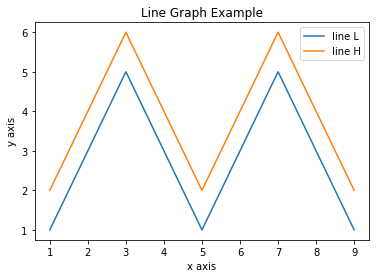

In [153]:
#Line Plots
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

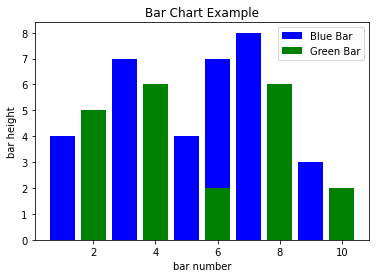

In [154]:
#Bar Plots
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

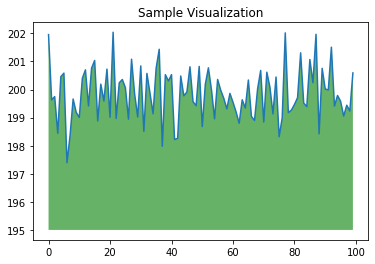

In [156]:
#La celda de código de abajo utiliza NumPy para generar datos aleatorios y Matplotlib para visualizarlo
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [169]:
#Utilizando la función built-in de Python
from math import factorial
factorial(5)


120

In [170]:
#Utilizando recursividad
def fact_recursividad(n):
    if n > 1:
        return n * fact_recursividad(n - 1)
    else:
        return 1
fact_recursividad(5)

120